In [130]:
    import numpy as np
    import pandas as pd
    import itertools
    from sklearn.model_selection import train_test_split
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.linear_model import PassiveAggressiveClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [131]:
    #Read the data
    df=pd.read_csv('news.csv')
    documents=df
    #Get shape and head
    df.shape
    df.head()
    

,Unnamed: 0,title,text,label,Ages,Popularity,Visit
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,10,2872,9
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,20,4764,15
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,30,4541,5
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,4,610,18
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,28,2471,4


In [132]:
 #Read the data
df1=pd.read_csv('news1.csv')  
    #Get shape and head
df1.shape
df1.head()

,Unnamed: 0,title,text,label,Ages,Popularity,Visit
0,8290,The Mandela Effect was made by one overlooked ...,"link There is simply no more denying, for mill...",FAKE,23,1291,39
1,6227,CNN: One voter can make a difference by voting...,Channel list \nFollowing hurricane Matthew's f...,FAKE,7,2499,45
2,3255,Give Social Security recipients a CEO-style raise,(CNN) On Veterans Day we recognize and honor t...,REAL,15,1847,9
3,3177,"Fireworks erupt between Trump and Bush, Rubio ...",Sparks flew at the toughest and liveliest GOP ...,REAL,27,978,19
4,2832,"Obama, sounding like his critics, admits no 'c...",The online comment fits closely with his campa...,REAL,5,1877,31


In [133]:
    #DataFlair - Get the labels
    labels=df.label
    labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [134]:
    #DataFlair - Split the dataset
    x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)
    x_train1,x_test1,y_train1,y_test1=train_test_split(df1['text'],df1.label, test_size=0.2, random_state=7)

In [135]:
    #DataFlair - Initialize a TfidfVectorizer
    tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
    #DataFlair - Fit and transform train set, transform test set
    tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
    tfidf_test=tfidf_vectorizer.transform(x_test)
    tfidf_train1=tfidf_vectorizer.fit_transform(x_train1) 
    tfidf_test1=tfidf_vectorizer.transform(x_test1)

In [136]:
print(tfidf_test)

  (0, 60262)	0.0589080415738444
  (0, 60216)	0.033460752541992766
  (0, 59810)	0.045817792225683496
  (0, 59800)	0.0794682278490348
  (0, 58665)	0.10993755459740154
  (0, 58588)	0.08060319869645292
  (0, 58210)	0.07134835692437816
  (0, 57894)	0.06780812513462667
  (0, 56651)	0.12410475651603367
  (0, 54746)	0.21027976596289072
  (0, 54285)	0.03552074107304668
  (0, 53976)	0.10580726044779917
  (0, 53822)	0.06240788146815191
  (0, 53335)	0.049487021551921764
  (0, 53106)	0.11735169513310507
  (0, 52734)	0.06002452279750512
  (0, 52145)	0.14044056450371686
  (0, 52073)	0.0737992820108964
  (0, 51554)	0.14044056450371686
  (0, 51549)	0.030496425530552585
  (0, 51258)	0.12038827865124155
  (0, 51123)	0.08122589173214691
  (0, 50758)	0.0533456490591578
  (0, 50606)	0.0736980348986726
  (0, 49676)	0.06494967271203761
  :	:
  (1266, 16711)	0.08067735120504209
  (1266, 16262)	0.06555099860067067
  (1266, 15876)	0.03282419297624164
  (1266, 14772)	0.05548370246894161
  (1266, 13011)	0.06704201

In [137]:
    #DataFlair - Initialize a PassiveAggressiveClassifier
    pac=PassiveAggressiveClassifier(max_iter=50)
    pac.fit(tfidf_train,y_train)
    #DataFlair - Predict on the test set and calculate accuracy
    y_pred=pac.predict(tfidf_test)
    score=accuracy_score(y_test,y_pred)
    print(f'Accuracy: {round(score*100,2)}%')
    
     #DataFlair - Initialize a PassiveAggressiveClassifier
    pac2=PassiveAggressiveClassifier(max_iter=50)
    pac2.fit(tfidf_train1,y_train1)
    #DataFlair - Predict on the test set and calculate accuracy
    y_pred2=pac2.predict(tfidf_test1)
    score=accuracy_score(y_test1,y_pred2)
    print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.87%
Accuracy: 92.07%


In [138]:
    #DataFlair - Build confusion matrix
    print(confusion_matrix(y_test,y_pred, labels=['FAKE','REAL']))
    confusion_matrix(y_test1,y_pred2, labels=['FAKE','REAL'])

[[582  52]
 [ 40 582]]


array([[560,  37],
       [ 50, 589]])

In [139]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [140]:
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/viorel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [141]:
processed_docs = documents['text'].map(preprocess)


In [142]:
#Bag of words on the dataset
processed_docs[:10]

0    [daniel, greenfield, shillman, journal, fellow...
1    [googl, pinterest, digg, linkedin, reddit, stu...
2    [secretari, state, john, kerri, say, monday, s...
3    [kayde, king, kaydeek, novemb, lesson, tonight...
4    [primari, york, runner, hillari, clinton, dona...
5    [immigr, grandpar, year, arriv, york, citi, ir...
6    [share, bayle, luciani, leav, screenshot, bayl...
7    [czech, stockbrok, save, jewish, children, naz...
8    [hillari, clinton, donald, trump, inaccur, cla...
9    [iranian, negoti, report, ditch, push, concess...
Name: text, dtype: object

In [143]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [144]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abedin
1 abus
2 accus
3 admit
4 afraid
5 agenc
6 agent
7 ahead
8 aliv
9 alleg
10 alli


In [145]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [146]:
#TF-IDF
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(1, 1),
 (5, 1),
 (13, 6),
 (15, 1),
 (19, 2),
 (22, 1),
 (23, 1),
 (30, 1),
 (43, 2),
 (53, 1),
 (54, 1),
 (60, 1),
 (64, 6),
 (67, 3),
 (72, 1),
 (73, 3),
 (84, 1),
 (102, 1),
 (115, 1),
 (130, 1),
 (134, 1),
 (155, 2),
 (161, 1),
 (164, 12),
 (167, 1),
 (173, 1),
 (181, 1),
 (186, 2),
 (190, 1),
 (195, 2),
 (205, 8),
 (209, 3),
 (210, 1),
 (217, 4),
 (218, 1),
 (235, 1),
 (237, 2),
 (238, 1),
 (241, 2),
 (246, 7),
 (254, 1),
 (269, 7),
 (272, 1),
 (273, 1),
 (288, 1),
 (291, 3),
 (293, 3),
 (295, 1),
 (300, 1),
 (302, 5),
 (303, 1),
 (309, 1),
 (322, 2),
 (324, 3),
 (325, 1),
 (341, 1),
 (344, 1),
 (345, 6),
 (349, 1),
 (355, 1),
 (356, 2),
 (357, 1),
 (381, 1),
 (391, 2),
 (394, 1),
 (395, 4),
 (400, 1),
 (406, 1),
 (414, 1),
 (432, 1),
 (439, 2),
 (444, 1),
 (468, 1),
 (483, 1),
 (492, 1),
 (495, 1),
 (520, 1),
 (523, 1),
 (532, 1),
 (537, 1),
 (548, 3),
 (550, 1),
 (552, 1),
 (580, 1),
 (581, 1),
 (595, 1),
 (603, 1),
 (607, 1),
 (640, 4),
 (646, 2),
 (655, 1),
 (664, 13),
 (668

In [147]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 1 ("abus") appears 1 time.
Word 5 ("agenc") appears 1 time.
Word 13 ("american") appears 6 time.
Word 15 ("appear") appears 1 time.
Word 19 ("assault") appears 2 time.
Word 22 ("attack") appears 1 time.
Word 23 ("away") appears 1 time.
Word 30 ("behavior") appears 1 time.
Word 43 ("call") appears 2 time.
Word 53 ("clinton") appears 1 time.
Word 54 ("close") appears 1 time.
Word 60 ("conspiraci") appears 1 time.
Word 64 ("correct") appears 6 time.
Word 67 ("countri") appears 3 time.
Word 72 ("crimin") appears 1 time.
Word 73 ("current") appears 3 time.
Word 84 ("destroy") appears 1 time.
Word 102 ("fear") appears 1 time.
Word 115 ("freedom") appears 1 time.
Word 130 ("hillari") appears 1 time.
Word 134 ("hous") appears 1 time.
Word 155 ("know") appears 2 time.
Word 161 ("leav") appears 1 time.
Word 164 ("live") appears 12 time.
Word 167 ("look") appears 1 time.
Word 173 ("media") appears 1 time.
Word 181 ("news") appears 1 time.
Word 186 ("obama") appears 2 time.
Word 190 ("origin"

In [148]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [149]:
corpus_tfidf = tfidf[bow_corpus]

In [150]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break


[(0, 0.04192328276246215),
 (1, 0.03376090261633175),
 (2, 0.07147448797500501),
 (3, 0.027987458515456674),
 (4, 0.11868995853064392),
 (5, 0.024897590293294157),
 (6, 0.06383924800608112),
 (7, 0.025975192200267904),
 (8, 0.040363798314997944),
 (9, 0.025919637495066046),
 (10, 0.049362097353885886),
 (11, 0.01745344945042335),
 (12, 0.03217845251939455),
 (13, 0.009571519653827998),
 (14, 0.03720070796414863),
 (15, 0.03114495020749038),
 (16, 0.025256707601852113),
 (17, 0.04974495630690668),
 (18, 0.022931979566538585),
 (19, 0.09037472713675457),
 (20, 0.06490396974548494),
 (21, 0.03244355627384595),
 (22, 0.07714998796253995),
 (23, 0.018075471021416732),
 (24, 0.14424797984569676),
 (25, 0.04093197776335901),
 (26, 0.052945296863567096),
 (27, 0.04942331564021755),
 (28, 0.026333748725508883),
 (29, 0.06192271451018454),
 (30, 0.06522514073872497),
 (31, 0.03264668894395901),
 (32, 0.027229402530740736),
 (33, 0.0174961143281411),
 (34, 0.10303116690897772),
 (35, 0.0900850221

In [151]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [152]:
#Classification of the topics
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.007*"trump" + 0.004*"clinton" + 0.003*"republican" + 0.002*"sander" + 0.002*"deleg" + 0.002*"cruz" + 0.002*"parti" + 0.002*"vote" + 0.002*"campaign" + 0.002*"elect"
Topic: 1 Word: 0.002*"trump" + 0.002*"clinton" + 0.002*"republican" + 0.002*"obama" + 0.001*"vote" + 0.001*"saudi" + 0.001*"hous" + 0.001*"democrat" + 0.001*"senat" + 0.001*"parti"
Topic: 2 Word: 0.004*"dismantl" + 0.004*"obamacar" + 0.003*"trump" + 0.003*"reform" + 0.003*"list" + 0.003*"administr" + 0.003*"obama" + 0.003*"kill" + 0.003*"push" + 0.003*"earli"
Topic: 3 Word: 0.004*"trump" + 0.002*"clinton" + 0.002*"russia" + 0.002*"drug" + 0.002*"cancer" + 0.001*"obama" + 0.001*"republican" + 0.001*"elect" + 0.001*"presid" + 0.001*"white"
Topic: 4 Word: 0.003*"clinton" + 0.003*"trump" + 0.003*"hillari" + 0.002*"comey" + 0.002*"email" + 0.002*"investig" + 0.002*"russia" + 0.001*"russian" + 0.001*"republican" + 0.001*"elect"
Topic: 5 Word: 0.003*"clinton" + 0.003*"trump" + 0.002*"russia" + 0.002*"obama" + 0.00

In [153]:
#Performance evaluation by classifying sample document using LDA TF-IDF model
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5059831142425537	 
Topic: 0.007*"trump" + 0.004*"clinton" + 0.003*"republican" + 0.002*"sander" + 0.002*"deleg" + 0.002*"cruz" + 0.002*"parti" + 0.002*"vote" + 0.002*"campaign" + 0.002*"elect"

Score: 0.25179606676101685	 
Topic: 0.003*"clinton" + 0.003*"trump" + 0.002*"russia" + 0.002*"obama" + 0.002*"isi" + 0.002*"polic" + 0.002*"russian" + 0.002*"syria" + 0.002*"hillari" + 0.002*"attack"

Score: 0.24074803292751312	 
Topic: 0.008*"trump" + 0.006*"clinton" + 0.003*"sander" + 0.003*"hillari" + 0.003*"email" + 0.003*"cruz" + 0.002*"vote" + 0.002*"campaign" + 0.002*"republican" + 0.002*"debat"


In [154]:
#Detectie in functe de vechime si popularitate.


#DataFlair - Split the dataset 1
X_train,X_test,y_train,y_test=train_test_split(df[['Ages','Popularity']], labels, test_size=0.2, random_state=7)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

#DataFlair - Split the dataset 2
X_train1,X_test1,y_train1,y_test1=train_test_split(df1[['Ages','Popularity']],df1.label, test_size=0.2, random_state=7)
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

print(X_train_scaled1)

[[0.4137931  0.45070423]
 [0.65517241 0.58501735]
 [0.4137931  0.03163911]
 ...
 [0.06896552 0.95448051]
 [0.82758621 0.89957134]
 [0.65517241 0.04776485]]
[[0.87179487 0.03652653]
 [0.74358974 0.65024121]
 [0.38461538 0.99586492]
 ...
 [0.12820513 0.4145417 ]
 [0.64102564 0.08787043]
 [0.12820513 0.23914542]]


In [155]:
from sklearn.pipeline import Pipeline
from sklearn import svm
# "scaler" & "svm" can be any name. But they must be placed in the correct order of processing
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", svm.SVC())])
#Dataset 1
pipe.fit(X_train_scaled, y_train)

print(pipe.score(X_test_scaled, y_test))
#Dataset  2

pipe.fit(X_train_scaled1, y_train1)

pipe.score(X_test_scaled1, y_test1)



0.48539857932123126


0.49278846153846156

In [156]:
list=[]
list1=[]
X_col=df['Ages']
X_fake=df['label']
for x in range(0,len(X_fake)):
  if X_fake[x] =="FAKE":    
    list.append(X_col[x])    
  elif X_fake[x] =="REAL":
      list1.append(X_col[x])
    
listd=[]
listd1=[]
X_cold=df['Ages']
X_faked=df['label']
for x in range(0,len(X_faked)):
  if X_faked[x] =="FAKE":    
    listd.append(X_cold[x])    
  elif X_fake[x] =="REAL":
      listd1.append(X_cold[x])


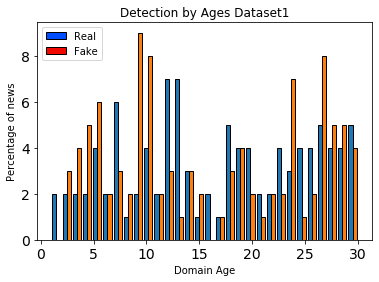

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle


x = [list1[:100],list[:100]]
N, bins, patches = plt.hist(x, 30, ec="k")

cmap = plt.get_cmap('jet')
low = cmap(0.2)
medium =cmap(0.9)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium]]
labels= ["Real","Fake"]
plt.legend(handles, labels)

plt.xlabel('Domain Age')
plt.ylabel('Percentage of news')
plt.title("Detection by Ages Dataset1")
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)


plt.show()

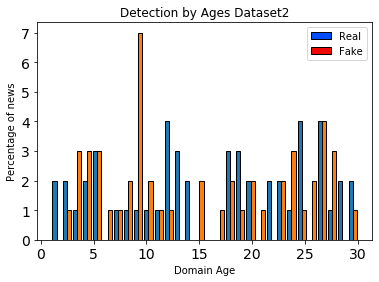

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle


x = [listd1[:50],listd[:50]]
N, bins, patches = plt.hist(x, 30, ec="k")

cmap = plt.get_cmap('jet')
low = cmap(0.2)
medium =cmap(0.9)

#create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low,medium]]
labels= ["Real","Fake"]
plt.legend(handles, labels)

plt.xlabel('Domain Age')
plt.ylabel('Percentage of news')
plt.title("Detection by Ages Dataset2")
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)


plt.show()

In [159]:
list=[]
list1=[]
listsortreal=[] 
listsortfalse=[]
X_col=df['Popularity']
X_col2=df['Visit']
X_fake=df['label']
for x in range(0,len(X_fake)):
  if X_fake[x] =="FAKE":    
    list.append(X_col[x]/X_col2[x])
    listsortfalse.append(X_col[x]/X_col2[x])
  elif X_fake[x] =="REAL":
      list1.append(X_col[x]/X_col2[x])
      listsortreal.append(X_col[x]/X_col2[x])
    
list1.sort(reverse=True)
listsortreal.sort()
list.sort(reverse=True)
listsortfalse.sort()

listd=[]
listd1=[]
listsortreald=[] 
listsortfalsed=[]
X_cold=df1['Popularity']
X_cold2=df1['Visit']
X_faked=df1['label']
for x in range(0,len(X_faked)):
  if X_faked[x] =="FAKE":    
    listd.append(X_cold[x]/X_cold2[x])
    listsortfalsed.append(X_cold[x]/X_cold2[x])
  elif X_faked[x] =="REAL":
      listd1.append(X_cold[x]/X_cold2[x])
      listsortreald.append(X_cold[x]/X_cold2[x])
    
listd1.sort(reverse=True)
listsortreald.sort()


listd.sort(reverse=True)
listsortfalsed.sort()
print(listsortreal[:10])
print(list1[100:500])

[5.421052631578948, 5.7, 6.833333333333333, 7.125, 7.35, 7.45, 7.533333333333333, 7.684210526315789, 8.2, 8.5625]
[2253.0, 2235.5, 2233.0, 2229.5, 2225.0, 2210.0, 2181.0, 2166.5, 2158.0, 2156.0, 2145.5, 2143.0, 2121.0, 2097.5, 2091.5, 2090.5, 2087.5, 2066.0, 2057.0, 2044.0, 2035.0, 2034.0, 2032.0, 2029.0, 2025.5, 2021.5, 2013.0, 2012.0, 2004.0, 2000.0, 1988.0, 1981.0, 1950.0, 1916.5, 1914.0, 1911.0, 1902.0, 1871.0, 1862.0, 1829.5, 1821.0, 1803.5, 1797.0, 1784.0, 1778.5, 1771.0, 1758.5, 1719.0, 1688.5, 1666.0, 1665.0, 1665.0, 1664.0, 1660.3333333333333, 1625.3333333333333, 1623.0, 1607.3333333333333, 1604.0, 1598.0, 1597.3333333333333, 1591.5, 1568.0, 1559.0, 1553.6666666666667, 1548.6666666666667, 1542.3333333333333, 1538.6666666666667, 1531.6666666666667, 1528.6666666666667, 1527.3333333333333, 1518.0, 1517.0, 1515.5, 1514.5, 1502.0, 1498.5, 1496.0, 1495.3333333333333, 1488.6666666666667, 1487.3333333333333, 1484.0, 1479.6666666666667, 1478.0, 1473.0, 1472.0, 1468.5, 1467.333333333333

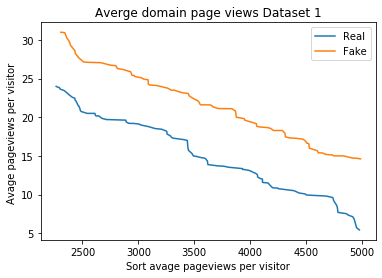

In [160]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
plt.plot(list1[:100],listsortreal[:100],label="Real")
plt.plot(list[:100],listsortfalse[50:150],label="Fake")
# naming the x axis 
plt.xlabel('Sort avage pageviews per visitor') 
# naming the y axis 
plt.ylabel('Avage pageviews per visitor ')   
# giving a title to my graph 
plt.title('Averge domain page views Dataset 1') 
plt.legend() 
# function to show the plot 
plt.show() 

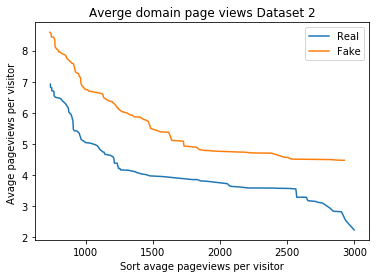

In [161]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
plt.plot(listd1[:100],listsortreald[:100],label="Real")
plt.plot(listd[:100],listsortfalsed[50:150],label="Fake")
# naming the x axis 
plt.xlabel('Sort avage pageviews per visitor') 
# naming the y axis 
plt.ylabel('Avage pageviews per visitor ')   
# giving a title to my graph 
plt.title('Averge domain page views Dataset 2') 
plt.legend() 
# function to show the plot 
plt.show() 